In [41]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('seaborn')
from bokeh.plotting import figure, output_file, show
pd.set_option('display.max_columns', 500)
params = {'legend.fontsize': 'x-large',
          'figure.figsize': (15, 5),
         'axes.labelsize': 'xx-large',
         'axes.titlesize':'x-large',
         'xtick.labelsize':'xx-large',
         'ytick.labelsize':'xx-large'}
plt.rcParams.update(params)

In [2]:
X_raw = pd.read_csv('../data/train_data.csv', dtype={'id': object})
y_raw = pd.read_csv('../data/train_targets.csv', dtype={'id': object})

# Join the two tables using their 'id' column
df = y_raw.set_index('id').join(X_raw.set_index('id'))

In [3]:
df['date_recorded'] =  pd.to_datetime(df['date_recorded'])


In [4]:
region_status = pd.DataFrame(df.groupby('region')['status_group'].value_counts())

In [5]:
reg = df.groupby('region')['status_group'].value_counts().unstack()

In [6]:
reg['pfunc'] = reg['functional'] / (reg['functional']
                                    + reg['functional needs repair']
                                    + reg['non functional'])
reg['prep'] = reg['functional needs repair'] / (reg['functional']
                                    + reg['functional needs repair']
                                    + reg['non functional'])
reg['pnon'] = reg['non functional'] / (reg['functional']
                                    + reg['functional needs repair']
                                    + reg['non functional'])

In [7]:
ratios = reg.drop(['functional', 'functional needs repair', 'non functional'], axis=1)
rename = {'pfunc':'functional','prep':'functional needs repair' , 'pnon':'non functional'}
ratios.rename(columns=rename, inplace=True)

In [20]:
sorted = ratios.sort_values('functional')
extreme = pd.concat([sorted.head(2), sorted.tail(2)])

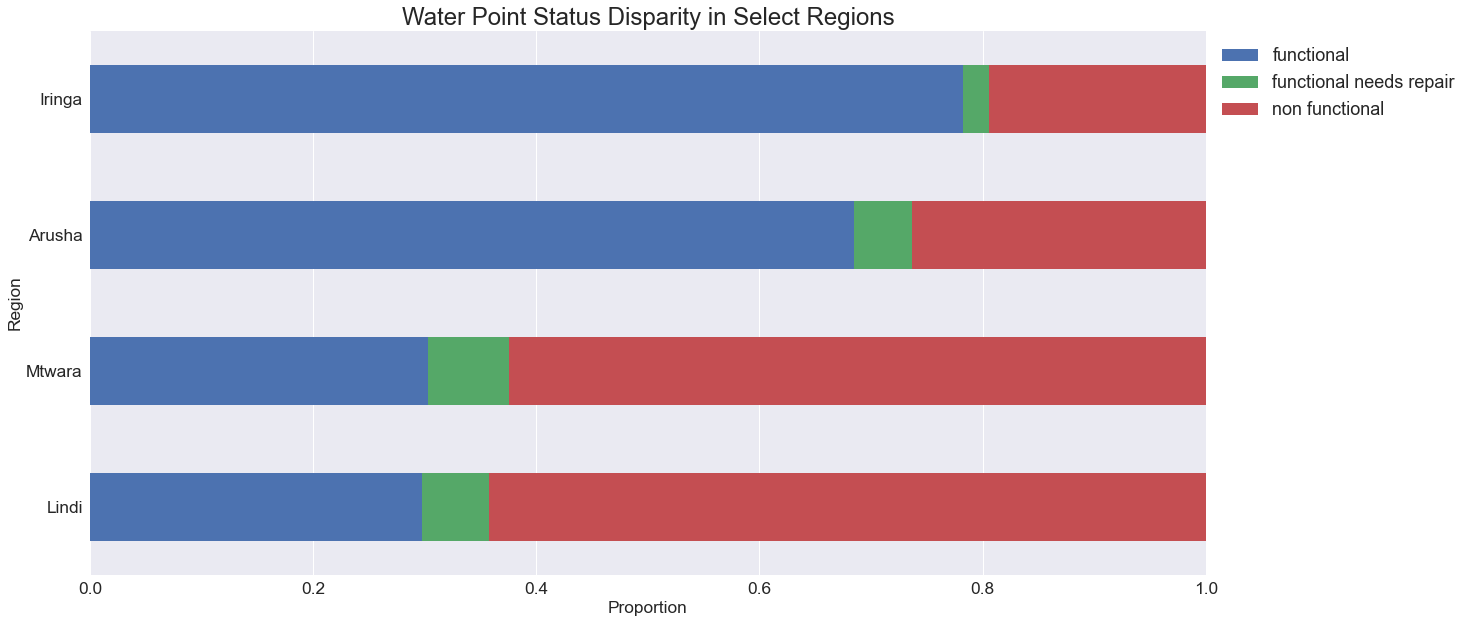

In [54]:
fig, ax = plt.subplots(figsize=(20,10))
ax.set_title('Water Point Status Disparity in Select Regions',
             fontdict={'fontsize':24})

ax.set_xlabel('Proportion')
ax.set_xlim(0,1)
extreme.plot.barh(stacked=True, ax=ax);
ax.set_ylabel('Region')
ax.legend(fontsize=18, bbox_to_anchor=(1,1));
plt.savefig('../reports/figures/region_disparity.png', tranparent=True)